# BIDMC Datathon Question #1
# English vs. Non-English Speaker MIMIC-III Cohort

# Notebook 2: Exploratory Analysis

In this notebook, we want to walk you through some basic steps on how to analyze the cohort which we generated in the first notebook. This notebook is meant to simply introduce a few first steps towards performing an exploratory analysis of the data as you begin building models as performing inference in your teams.

This notebook is just a quick introduction to analyzing the cohort in Python. It's up to you and your team to decide what and how you want to analyze the data! 

This is where our paths diverge! Looking forward to seeing where we all end up in the next 3 hours.

# Setup

## Prerequisites

- If you do not have a Gmail account, please create one at http://www.gmail.com. 
- If you have not yet signed the data use agreement (DUA) sent by the organizers, please do so now to get access to the dataset.

## Load libraries

Run the following cells to import some modules that we'll be using for analysis.

In [0]:
from google.colab import drive
import pandas as pd
import os

## Connect to Drive

We will mount our Google Drive to access the CSV file created in the earlier notebook.

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Loading Data

The last notebook focused on extracting the actual cohort and various covariates of potential interest. 

## Load from Drive

Here, we can just import the generated CSV file and directly start working with it.


In [0]:
FILE_NAME = 'dataset_datathon_28022020.csv'
MAIN_PATH = '/content/gdrive/My Drive/'
final_path = os.path.join(MAIN_PATH, FILE_NAME)

dataset = pd.read_csv(final_path)

(This is so much simpler than R!)

# Exploratory analysis

The first step in any data analysis should be **exploratory analysis** of the dataset. When performing an exploratory analysis, you should be checking high-level distributions of various covariates, marginal associations, and on the look out for potential messy data issues. 

We can start by just taking a look at the first few rows in the table.

In [27]:
dataset.head(5)

,subject_id,hadm_id,icustay_id,english,age,male,ethnicity,marital_status,religion,insurance,diagnosis,admission_type,admission_location,hosp_admittime,hosp_dischtime,los_hospital,first_careunit,icu_intime,icu_outtime,los_icu,ANIONGAP_min,ANIONGAP_max,ALBUMIN_min,ALBUMIN_max,BANDS_min,BANDS_max,BICARBONATE_min,BICARBONATE_max,BILIRUBIN_min,BILIRUBIN_max,CREATININE_min,CREATININE_max,CHLORIDE_min,CHLORIDE_max,GLUCOSE_min,GLUCOSE_max,HEMATOCRIT_min,HEMATOCRIT_max,HEMOGLOBIN_min,HEMOGLOBIN_max,...,gcs_score,comorbidity_score,admissiontype_score,congestive_heart_failure,cardiac_arrhythmias,valvular_disease,pulmonary_circulation,peripheral_vascular,hypertension,paralysis,other_neurological,chronic_pulmonary,diabetes_uncomplicated,diabetes_complicated,hypothyroidism,renal_failure,liver_disease,peptic_ulcer,aids,lymphoma,metastatic_cancer,solid_tumor,rheumatoid_arthritis,coagulopathy,obesity,weight_loss,fluid_electrolyte,blood_loss_anemia,deficiency_anemias,alcohol_abuse,drug_abuse,psychoses,depression,elixhauser_vanwalraven,elixhauser_sid29,elixhauser_sid30,sepsis_3,sofa,mechvent_event,mechvent_free_days
0,109,189332,287547,1,25.1,0,BLACK/AFRICAN AMERICAN,SINGLE,NOT SPECIFIED,Medicaid,SHORTNESS OF BREATH,EMERGENCY,EMERGENCY ROOM ADMIT,2142-08-28T19:48:00Z,2142-08-30T15:20:00Z,1.8139,MICU,2142-08-28T19:49:27Z,2142-08-30T16:10:05Z,1.8477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,6,1.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,40.0,46.0,0,NaN,0,NaN
1,111,155897,249202,1,69.0,0,WHITE,MARRIED,PROTESTANT QUAKER,Medicare,PNEUMONIA,EMERGENCY,EMERGENCY ROOM ADMIT,2144-07-01T04:12:00Z,2144-07-01T14:55:00Z,0.4465,MICU,2144-07-01T04:13:59Z,2144-07-01T17:56:31Z,0.5712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,6,1.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,29.0,33.0,0,NaN,1,0.185081
2,124,138376,256064,1,75.1,1,WHITE,MARRIED,CATHOLIC,Medicare,PNEUMONIA;CHRONIC OBST PULM DISEASE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2165-12-31T18:55:00Z,2166-02-01T06:55:00Z,31.5000,SICU,2166-01-09T13:05:18Z,2166-02-01T10:52:09Z,22.9075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.0,0,6,1.0,1.0,0.0,0.0,0.0,1,0.0,0.0,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,25.0,35.0,0,NaN,1,2.235521
3,188,132401,246866,1,56.6,1,WHITE,MARRIED,CATHOLIC,Private,BACK PAIN,EMERGENCY,CLINIC REFERRAL/PREMATURE,2161-11-01T17:48:00Z,2162-01-17T05:50:00Z,76.5014,SICU,2161-12-09T17:03:04Z,2161-12-17T21:04:31Z,8.1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,6,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,27.0,35.0,0,NaN,1,1.544803
4,305,194340,217232,0,76.9,0,WHITE,MARRIED,CATHOLIC,Medicare,HEART FAILURE,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,2129-08-20T18:03:00Z,2129-09-07T17:55:00Z,17.9944,SICU,2129-09-03T12:31:31Z,2129-09-05T23:00:50Z,2.4370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,0,6,1.0,0.0,0.0,0.0,1.0,0,0.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,31.0,37.0,1,6.0,0,NaN


We can rename the columns to all be uppercase for consistency and so we don't have to worry about remember the case of different columns.

In [0]:
dataset.columns = [_.upper() for _ in dataset.columns]

## Language

We should start to analyze our cohort and find out if there is a significant relationship between end-of-life treatment between English and non-English speaking patients.

Let's start by just taking a look at how many of the patients in our cohort were labeled as English speakers.

In [36]:
english_col = 'ENGLISH'
dataset[english_col].value_counts()

1    2024
0     261
Name: ENGLISH, dtype: int64

We can also plot this to take a look.

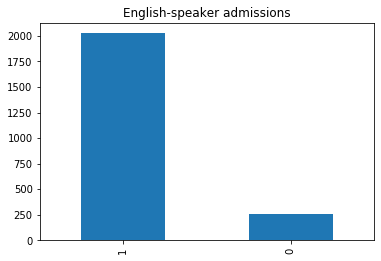

In [34]:
# Count number of admissions for English vs. Non-English speakers
dataset[english_col].value_counts().plot(kind='bar', title='English-speaker admissions')

It looks like most patients in our cohort spoke English.

From this point, you can try to stratify by outcomes. 
- What outcomes do you define as as invasive procedures in our dataset?
- How do you want to group those invasive procedures? Maybe adding a boolean (0/1) column to the dataset which indicates procedures? 
- Do the same statistics for each different type of invasive procedure (ventilation, CRRT etc.)

_Tip_: You can use both R and Python in Colab notebooks, so pick your favorite language to get started quickly!


# Creating a "Table 1"

In reports or papers for clinical trials or retrospective data studies, you'll often find a cohort summary table presented as _Table 1_. Table 1 describes the cohort's characteristics, such as age, sex, and ethnicity, stratified by the exposure under investigation. Often, the exposure groups are shown as two columns in the table (e.g. group A and group B). Creating these tables can be fairly tedious, especially when the list of potentially confounding covariates is long.

The good news: there are plenty of packages for generating these tables automatically (in both Python _and_ R), so you only need to reshape your dataset, handle missing data (depending on the package) and call the corresponding functions in the respective Python and R libraries.

The following 2 are examples of packages that can be used to generate a "Table 1" in Python and R:

- Python: [Table One](https://pypi.org/project/tableone/)
- R: [Table One](https://cran.r-project.org/web/packages/tableone/vignettes/introduction.html)

In this section of the notebook, consider generating a "Table 1", analyze the results and include it in your final presentation. To do this, however, you first need to define the stratifying exposure or variable (e.g. English vs. non-English speaking) and define the set of covariates (rows) you want to display. 

Keep these things in mind while performing your analysis and consider creating Table 1 and performing exploratory analysis extensively *early on*!